<a href="https://colab.research.google.com/github/smkerr/COVID-fake-news-detection/blob/main/Text%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data pre-processing

Hi Marco! - Steve & Hannah

####Load libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load data set

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/COVID-fake-news-detection/data/Constraint_Test.csv')

In [6]:
test_data = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/Constraint_Test.csv')

In [ ]:
test_data_label = pd.read_csv('/content/drive/MyDrive/COVID-fake-news-detection/data/english_test_with_labels.csv')

In [4]:
val_data = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/Constraint_Val.csv')

In [27]:
train_data = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/Constraint_Train.csv')

#### Data set exploration

##### Test data

In [ ]:
test_data.head()

id                                              tweet
0   1  Our daily update is published. States reported...
1   2             Alfalfa is the only cure for COVID-19.
2   3  President Trump Asked What He Would Do If He W...
3   4  States reported 630 deaths. We are still seein...
4   5  This is the sixth time a global health emergen...

In [ ]:
test_data2.head()

id                                              tweet
0   1  Our daily update is published. States reported...
1   2             Alfalfa is the only cure for COVID-19.
2   3  President Trump Asked What He Would Do If He W...
3   4  States reported 630 deaths. We are still seein...
4   5  This is the sixth time a global health emergen...

In [ ]:
test_data_label.head()

id                                              tweet label
0   1  Our daily update is published. States reported...  real
1   2             Alfalfa is the only cure for COVID-19.  fake
2   3  President Trump Asked What He Would Do If He W...  fake
3   4  States reported 630 deaths. We are still seein...  real
4   5  This is the sixth time a global health emergen...  real

In [ ]:
test_data.count()

id       2140
tweet    2140
dtype: int64

In [ ]:
test_data_label.iloc[1:, :]

id                                              tweet label
1        2             Alfalfa is the only cure for COVID-19.  fake
2        3  President Trump Asked What He Would Do If He W...  fake
3        4  States reported 630 deaths. We are still seein...  real
4        5  This is the sixth time a global health emergen...  real
5        6  Low #vitaminD was an independent predictor of ...  real
...    ...                                                ...   ...
2135  2136  #CoronaVirusUpdates: State-wise details of Tot...  real
2136  2137  Tonight 12(midnight) onwards Disaster Manageme...  fake
2137  2138  296 new cases of #COVID19Nigeria; Plateau-85 E...  real
2138  2139  RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...  real
2139  2140  More than half of pregnant women recently admi...  real

[2139 rows x 3 columns]

In [ ]:
test_data_label.iloc[:, :-1].compare(test_data)

Empty DataFrame
Columns: []
Index: []

In [ ]:
test_data_label.groupby('label')['tweet'].count()

label
fake    1020
real    1120
Name: tweet, dtype: int64

##### Train data

In [ ]:
train_data.head()

id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real

In [ ]:
train_data.count()

id       6420
tweet    6420
label    6420
dtype: int64

In [ ]:
train_data.groupby('label')['tweet'].count()

label
fake    3060
real    3360
Name: tweet, dtype: int64

##### Validation data

In [ ]:
val_data.head()

id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real

In [ ]:
val_data.count()

id       2140
tweet    2140
label    2140
dtype: int64

In [ ]:
val_data.groupby('label')['tweet'].count()

label
fake    1020
real    1120
Name: tweet, dtype: int64

#### Build corpus

##### Stop words

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#import re
contractions_dict = {
    'didn\'t': 'did not',
    'don\'t': 'do not',
    }
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)

expand_contractions('You don\'t need a library')

'You do not need a library'

In [ ]:
train_data['tweet'].apply(expand_contractions)

0       The CDC currently reports 99031 deaths. In gen...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID-19 please st...
6416    ???Autopsies prove that COVID-19 is??� a blood...
6417    _A post claims a COVID-19 vaccine has already ...
6418    Aamir Khan Donate 250 Cr. In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [10]:
stops = set(stopwords.words("english"))

In [ ]:
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = text.replace('&amp;',' ')
    text = re.sub(r"&",' and ',text)  
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [8]:
def cleantext_rem_numb(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = text.replace('&amp;',' ')
    text = re.sub(r"&",' and ',text)  
    text = re.sub(r"[^a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [ ]:
test = ["RT @icmrnirrh: #COVID19 #Pandemic increases the risk of perinatal anxiety depression &amp; #DomesticViolence It is critically important that s…"]
dframe = pd.DataFrame(test)

In [ ]:
dframe[0].apply(cleantext)[0]

'rt icmrnirrh covid19 pandemic increases risk perinatal anxiety depression domesticviolence critically important'

In [11]:
test_data['tweet'].map(lambda x: cleantext_rem_numb(x))

0       daily update published states reported k tests...
1                                      alfalfa cure covid
2       president trump asked would catch coronavirus ...
3       states reported deaths still seeing solid nati...
4       sixth time global health emergency declared in...
                              ...                        
2135    coronavirusupdates state wise details total co...
2136    tonight midnight onwards disaster management a...
2137    new cases covid nigeria plateau enugu oyo lago...
2138    rt cdcemergency dyk cdcgov one stop shop covid...
2139    half pregnant women recently admitted uk hospi...
Name: tweet, Length: 2140, dtype: object

In [ ]:
test_data2['tweet'].map(lambda x: cleantext_rem_numb(x))

0       daily update published states reported k tests...
1                                      alfalfa cure covid
2       president trump asked would catch coronavirus ...
3       states reported deaths still seeing solid nati...
4       sixth time global health emergency declared in...
                              ...                        
2135    coronavirusupdates state wise details total co...
2136    tonight midnight onwards disaster management a...
2137    new cases covid nigeria plateau enugu oyo lago...
2138    rt cdcemergency dyk cdcgov one stop shop covid...
2139    half pregnant women recently admitted uk hospi...
Name: tweet, Length: 2140, dtype: object

In [21]:
preprocessed = train_data['tweet'].apply(cleantext_rem_numb)

In [28]:
preprocessed = train_data

In [30]:

preprocessed['tweet'] = preprocessed['tweet'].apply(cleantext_rem_numb)

In [ ]:
preprocessed2 = train_data['tweet'].apply(cleantext_rem_numb)

In [ ]:
train_data['tweet'].apply(remove_stopwords)

0       CDC currently reports 99031 deaths. general di...
1       States reported 1121 deaths small rise last Tu...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: 1524 #COVID testing labora...
4       Populous states generate large case counts loo...
                              ...                        
6415    tiger tested positive COVID-19 please stay awa...
6416    ???Autopsies prove COVID-19 is??� blood clot, ...
6417    _A post claims COVID-19 vaccine already develo...
6418       Aamir Khan Donate 250 Cr. PM Relief Cares Fund
6419    93 days since last case COVID-19 acquired loca...
Name: tweet, Length: 6420, dtype: object

In [20]:
train_data.head()

id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real

In [31]:
preprocessed.head()

id                                              tweet label
0   1  cdc currently reports deaths general discrepan...  real
1   2  states reported deaths small rise last tuesday...  real
2   3  politically correct woman almost uses pandemic...  fake
3   4  indiafightscorona covid testing laboratories i...  real
4   5  populous states generate large case counts loo...  real

In [ ]:
preprocessed2.head()

NameError: ignored

In [ ]:
train_data['tweet'].apply(expand_contractions)

0       The CDC currently reports 99031 deaths. In gen...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID-19 please st...
6416    ???Autopsies prove that COVID-19 is??� a blood...
6417    _A post claims a COVID-19 vaccine has already ...
6418    Aamir Khan Donate 250 Cr. In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

#### Word Cloud 

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<function matplotlib.pyplot.show>

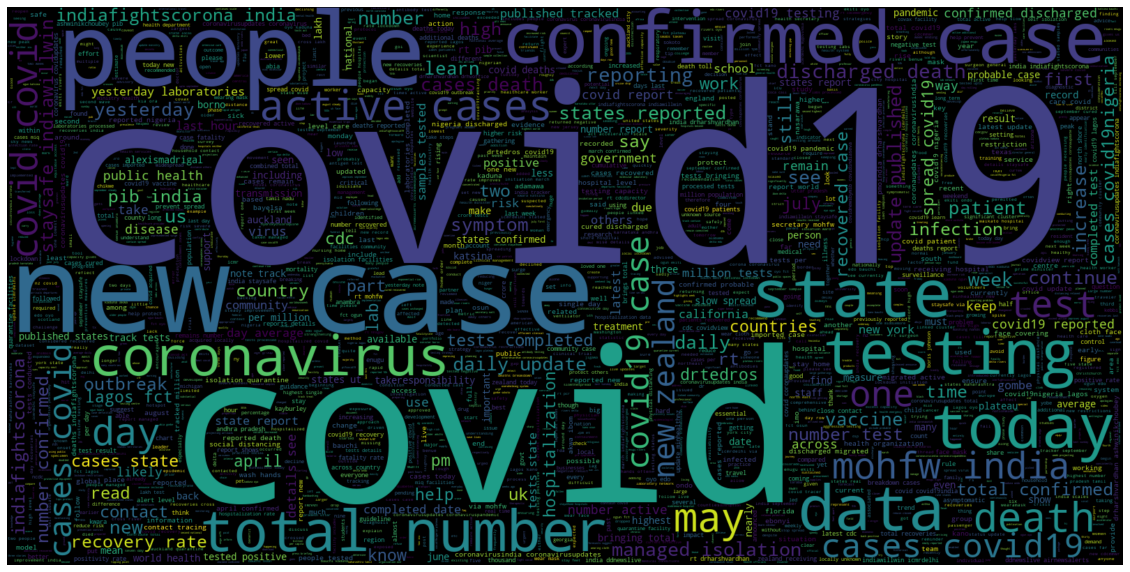

In [ ]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train_data[train_data.label == "real"].tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

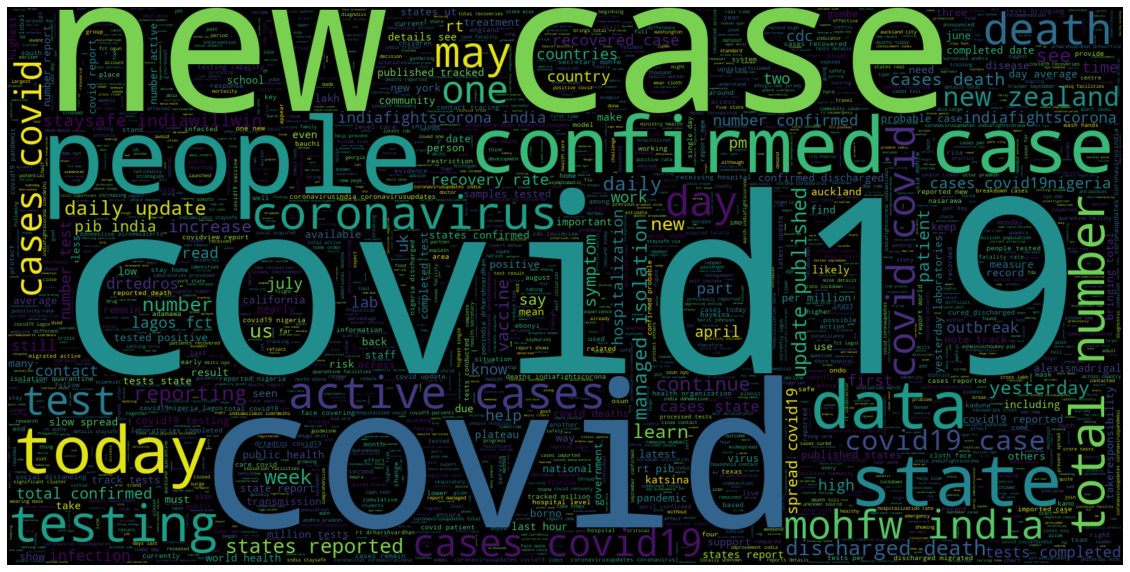

In [ ]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(preprocessed[preprocessed.label == "real"].tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

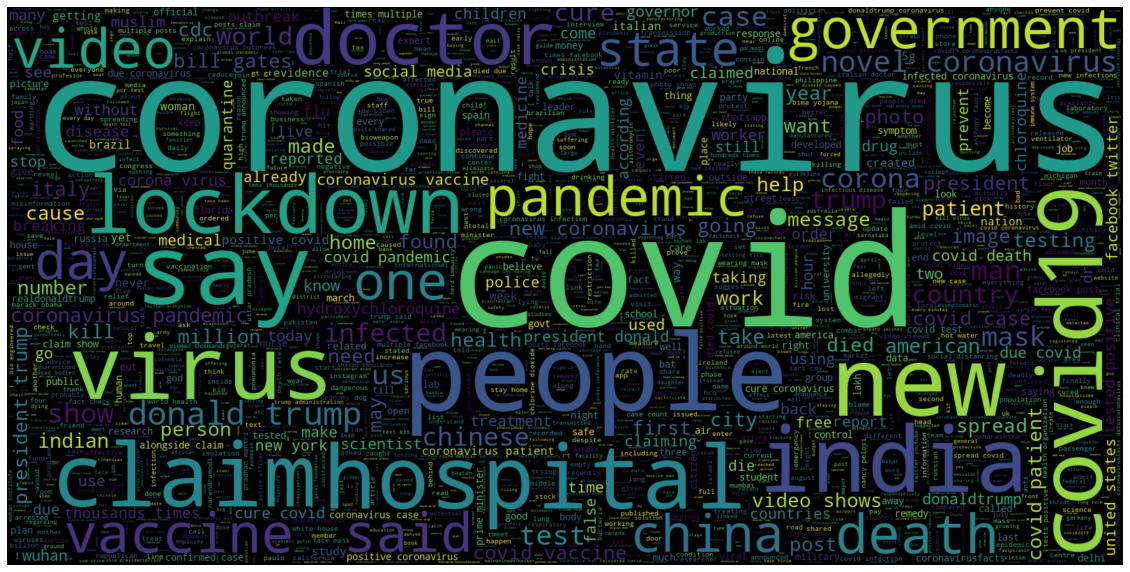

In [ ]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train_data[train_data.label == "fake"].tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

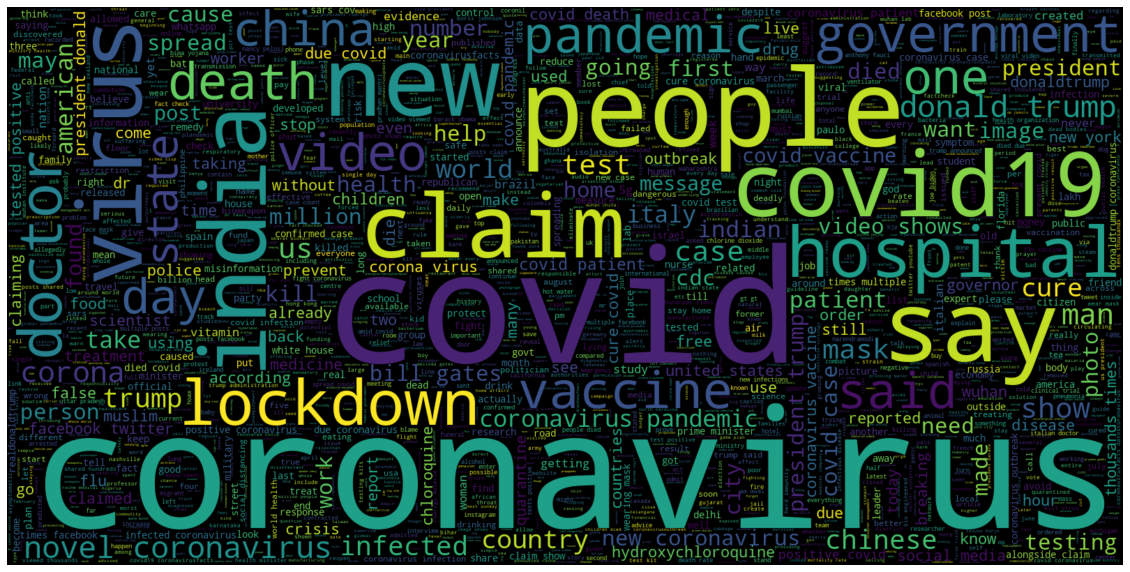

In [ ]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(preprocessed[preprocessed.label == "fake"].tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

#### Frequency

In [23]:
preprocessed

0       cdc currently reports deaths general discrepan...
1       states reported deaths small rise last tuesday...
2       politically correct woman almost uses pandemic...
3       indiafightscorona covid testing laboratories i...
4       populous states generate large case counts loo...
                              ...                        
6415    tiger tested positive covid please stay away p...
6416    autopsies prove covid blood clot pneumonia oug...
6417    post claims covid vaccine already developed ca...
6418            aamir khan donate cr pm relief cares fund
6419    days since last case covid acquired locally un...
Name: tweet, Length: 6420, dtype: object

In [14]:
freq = preprocessed.tweet.str.split(expand=True).stack().value_counts()

AttributeError: ignored

In [32]:
freq_real = preprocessed[preprocessed.label == "real"].tweet.str.split(expand=True).stack().value_counts()
freq_fake = preprocessed[preprocessed.label == "fake"].tweet.str.split(expand=True).stack().value_counts()

In [33]:
freq_real.head(25)
freq_fake.head(25)

covid          1431
coronavirus    1325
people          303
trump           255
virus           235
pandemic        231
new             223
india           221
video           204
vaccine         196
says            192
president       181
hospital        166
lockdown        154
cases           145
news            140
government      135
shows           132
said            131
claims          131
claim           127
corona          125
health          121
patients        119
china           117
dtype: int64

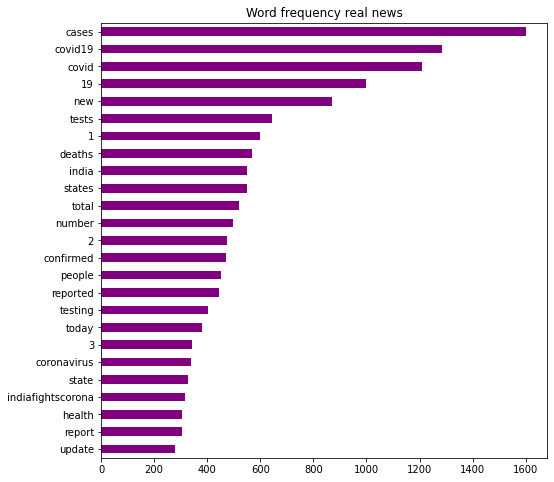

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
freq_real.head(25).sort_values().plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Word frequency real news")

plt.show()

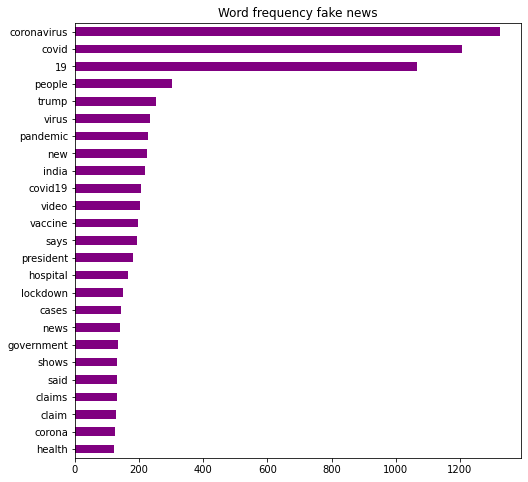

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
freq_fake.head(25).sort_values().plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Word frequency fake news")

plt.show()

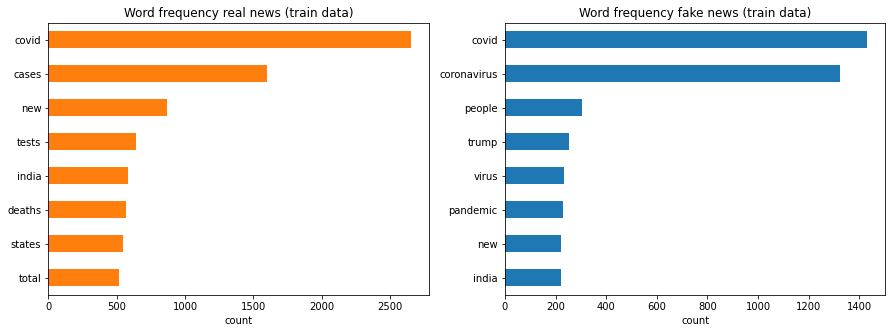

In [69]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

# Plot horizontal bar graph
freq_real.head(8).sort_values().plot.barh(x='words',
                      y='count',
                      ax=ax1,
                      color="tab:orange")

ax1.set_title("Word frequency real news (train data)")
ax1.set_xlabel('count')

# Plot horizontal bar graph
freq_fake.head(8).sort_values().plot.barh(x='words',
                      y='count',
                      ax=ax2,
                      color="tab:blue")

ax2.set_title("Word frequency fake news (train data)")
ax2.set_xlabel('count')

plt.savefig('Word_frequency.png')

plt.show()

#### Characters and words per tweet

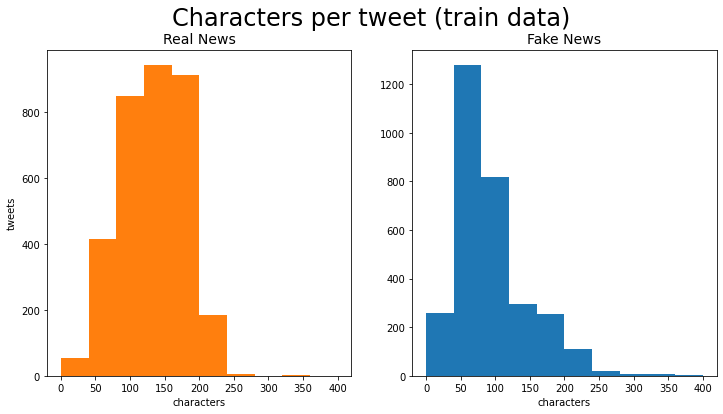

In [81]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

text_len=preprocessed[preprocessed['label']=="real"]['tweet'].str.len()
ax1.hist(text_len,color='tab:orange', range=[0, 400])
ax1.set_title('Real News', fontsize=14)
ax1.set_xlabel('characters')
ax1.set_ylabel('tweets')

text_len=preprocessed[preprocessed['label']=="fake"]['tweet'].str.len()
ax2.hist(text_len,color='tab:blue', range=[0, 400])
ax2.set_title('Fake News', fontsize=14)
ax2.set_xlabel('characters')


fig.suptitle('Characters per tweet (train data)', fontsize=24)

plt.savefig('Character_per_tweet.png')
plt.show()

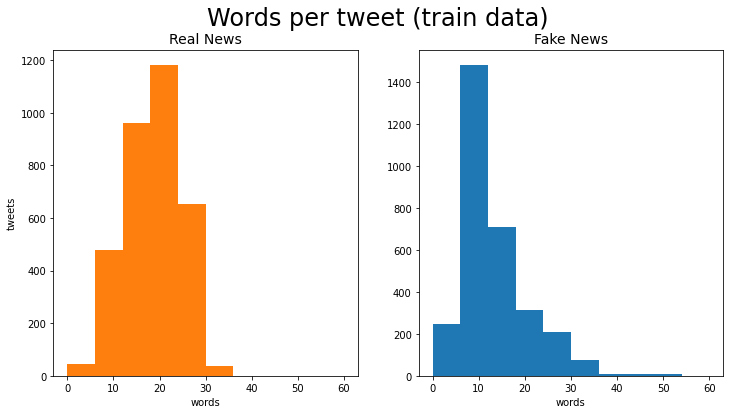

In [78]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

text_len=preprocessed[preprocessed['label']=="real"]['tweet'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='tab:orange', range=[0, 60])
ax1.set_title('Real News', fontsize=14)
ax1.set_xlabel('words')
ax1.set_ylabel('tweets')

text_len=preprocessed[preprocessed['label']=="fake"]['tweet'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='tab:blue', range=[0, 60])
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Words per tweet (train data)', fontsize=24)
ax2.set_xlabel('words')

plt.savefig('Words_per_tweet.png')
plt.show()

'Test

In [ ]:
!pip install git+https://github.com/atmarges/tweetnlp

  Cloning https://github.com/atmarges/tweetnlp to /tmp/pip-req-build-el0u3mp_
  Running command git clone -q https://github.com/atmarges/tweetnlp /tmp/pip-req-build-el0u3mp_
ERROR: File "setup.py" not found for legacy project git+https://github.com/atmarges/tweetnlp.


In [ ]:
! git clone https://github.com/atmarges/tweetnlp
%cd tweetnlp/tweetnlp/utils/
! pip install -r DataLoader.py 

Cloning into 'tweetnlp'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 103 (delta 53), reused 81 (delta 31), pack-reused 0
Receiving objects: 100% (103/103), 17.32 MiB | 12.27 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/tweetnlp/tweetnlp/utils/tweetnlp/tweetnlp/utils
ERROR: Invalid requirement: 'import os' (from line 1 of DataLoader.py)


In [ ]:
%cd tweetnlp/tweetnlp/utils/
! pip install -r requirements.txt

[Errno 2] No such file or directory: 'tweetnlp/tweetnlp/utils/'
/content/tweetnlp/tweetnlp/utils/tweetnlp/tweetnlp/utils
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
! git clone https://github.com/atmarges/tweetnlp
%cd tweetnlp
!git pull origin master
! pip install -r requirements.txt

Cloning into 'tweetnlp'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 103 (delta 53), reused 81 (delta 31), pack-reused 0
Receiving objects: 100% (103/103), 17.32 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/tweetnlp/tweetnlp/utils/tweetnlp/tweetnlp/utils/tweetnlp
From https://github.com/atmarges/tweetnlp
 * branch            master     -> FETCH_HEAD
Already up to date.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
from tweetnlp.utils.DataLoader import DataLoader

In [ ]:
dataset_path = "/content/drive/My Drive/COVID-fake-news-detection/data/Constraint_Test.csv"

loader = DataLoader(dataset_path)

x_train= loader.load_data(test_size=0.25)

AttributeError: ignored